In [1]:
import sympy as sp
import numpy as np
from sympy import symbols
sf = sp.SingularityFunction
import matplotlib.pyplot as plt

In [2]:
E, I = symbols('E, I')
x = symbols('x')

## constructie x^2/4
## theta x/2

In [3]:
## Voorbeeld 1: opgelegd op twee steunpunten
Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn,theta = sp.symbols('Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, theta')

# Define F and l
F = 10  ## KN
l = 4   ## m

# Define qz and qx
qz = -Av * sf(x, 0, -1) + F * sf(x, l/2, -1) - Bv * sf(x, l, -1)
qx = Ah * sf(x, 0, -1)

# Define V as a function of x
V1 = sp.cos(theta)* sp.integrate( -qz , x)
V2 = sp.sin(theta) * sp.tan(theta) * sp.integrate(-qx, x) 
V = V1 + V2 

# Define M as an integral of V
M = sp.integrate(V/ sp.cos(theta) , x) 
# Define phi as an integral of M
phi = sp.integrate(M, x) 
# Define W as an integral of -phi
W = sp.integrate(-phi, x) 

N1 = sp.sin(theta) * sp.integrate(qz, x) 
N2 =  sp.sin(theta) * sp.integrate(-qx, x) 
N = N1 + N2


# Display the expressions
display("V:", V)
display("M:", M)
display('phi',phi)
display('W',W)
display('N', N)

'V:'

-Ah*sin(theta)*tan(theta)*SingularityFunction(x, 0, 0) + (Av*SingularityFunction(x, 0, 0) + Bv*SingularityFunction(x, 4, 0) - 10*SingularityFunction(x, 2.0, 0))*cos(theta)

'M:'

(-Ah*sin(theta)*tan(theta)*SingularityFunction(x, 0, 1) + Av*cos(theta)*SingularityFunction(x, 0, 1) + Bv*cos(theta)*SingularityFunction(x, 4, 1) - 10*cos(theta)*SingularityFunction(x, 2.0, 1))/cos(theta)

'phi'

(-Ah*sin(theta)*tan(theta)*SingularityFunction(x, 0, 2)/2 + Av*cos(theta)*SingularityFunction(x, 0, 2)/2 + Bv*cos(theta)*SingularityFunction(x, 4, 2)/2 - 5*cos(theta)*SingularityFunction(x, 2.0, 2))/cos(theta)

'W'

-(-Ah*sin(theta)*tan(theta)*SingularityFunction(x, 0, 3)/6 + Av*cos(theta)*SingularityFunction(x, 0, 3)/6 + Bv*cos(theta)*SingularityFunction(x, 4, 3)/6 - 5*cos(theta)*SingularityFunction(x, 2.0, 3)/3)/cos(theta)

'N'

-Ah*sin(theta)*SingularityFunction(x, 0, 0) + (-Av*SingularityFunction(x, 0, 0) - Bv*SingularityFunction(x, 4, 0) + 10*SingularityFunction(x, 2.0, 0))*sin(theta)

In [4]:
V = V + Cv
M = M + (Cv*x)/sp.cos(theta) + Cm
phi = phi + Cv*x**2/(2*sp.cos(theta)) + Cm*x + Cphi
W = + W - Cv*x**3/(6 * sp.cos(theta)) - Cm*x**2/2 - Cphi* x + Cw
N = N + Cn
display(V, M, phi, W)

-Ah*sin(theta)*tan(theta)*SingularityFunction(x, 0, 0) + Cv + (Av*SingularityFunction(x, 0, 0) + Bv*SingularityFunction(x, 4, 0) - 10*SingularityFunction(x, 2.0, 0))*cos(theta)

Cm + Cv*x/cos(theta) + (-Ah*sin(theta)*tan(theta)*SingularityFunction(x, 0, 1) + Av*cos(theta)*SingularityFunction(x, 0, 1) + Bv*cos(theta)*SingularityFunction(x, 4, 1) - 10*cos(theta)*SingularityFunction(x, 2.0, 1))/cos(theta)

Cm*x + Cphi + Cv*x**2/(2*cos(theta)) + (-Ah*sin(theta)*tan(theta)*SingularityFunction(x, 0, 2)/2 + Av*cos(theta)*SingularityFunction(x, 0, 2)/2 + Bv*cos(theta)*SingularityFunction(x, 4, 2)/2 - 5*cos(theta)*SingularityFunction(x, 2.0, 2))/cos(theta)

-Cm*x**2/2 - Cphi*x - Cv*x**3/(6*cos(theta)) + Cw - (-Ah*sin(theta)*tan(theta)*SingularityFunction(x, 0, 3)/6 + Av*cos(theta)*SingularityFunction(x, 0, 3)/6 + Bv*cos(theta)*SingularityFunction(x, 4, 3)/6 - 5*cos(theta)*SingularityFunction(x, 2.0, 3)/3)/cos(theta)

In [5]:
## Voorwarden

eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+1) 

eq3 = M.subs(x, 0)
eq4 = M.subs(x, l)

eq5 = W.subs(x, l)
eq6 = W.subs(x, 0)

eq7 = N.subs(x, -1)
eq8 = N.subs(x, l)
equations = [eq1 -0, eq2-0,eq3-0,eq4-0,eq5-0,eq6-0, eq7-0, eq8-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn))

In [6]:
display(solutions)

{Cv: 0.0,
 Cm: 0.0,
 Cphi: -10.0000000000000,
 Cw: 0.0,
 Av: 5.00000000000000,
 Bv: 5.00000000000000,
 Ah: 0.0,
 Cn: 0.0}

In [7]:
Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn = 0,0, -10, 0, 5,5, 0, 0
x_val = np.linspace(0, l, 9000)
V_list = []
for i in x_val:
    theta = i/2
    V = sp.cos(theta) * (Av*sf(i,0,0) + Bv*sf(i, l, 0) - F*sf(i, 2, 0))
    V_list.append(V)

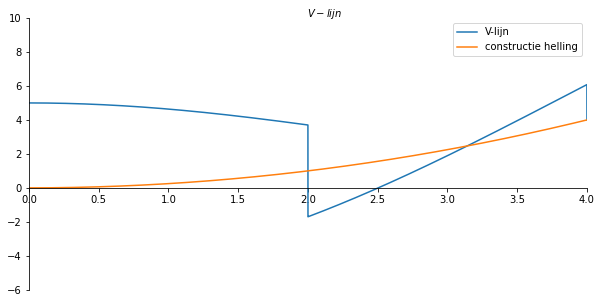

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, l)
ax.set_ylim(-6, 10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list) + x_val**2/(4) , label='V-lijn')
ax.plot(x_val, x_val**2/(4), label='constructie helling')
ax.legend();

In [9]:
x_val = np.linspace(0, l, 1000)
M_list = []
for i in x_val:
    theta = i/2
    M = Av * sf(i, 0, 1) + Bv * sf(i, 4, 1) - F * sf(i, 2, 1)
    M_list.append(M)

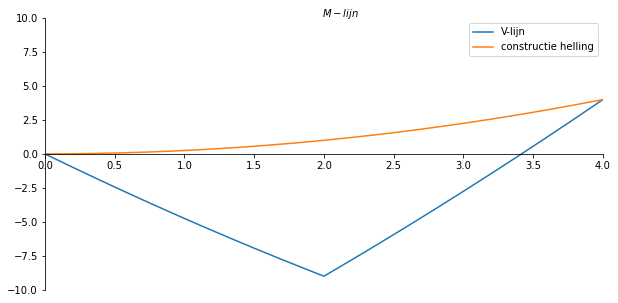

In [10]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, l)
ax.set_ylim(-10, 10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, - np.array(M_list) + x_val**2/(4) , label='V-lijn')
ax.plot(x_val, x_val**2/(4), label='constructie helling')
ax.legend();

In [11]:
x_val = np.linspace(0, l, 1000)
phi_list = []
for i in x_val:
    theta = i/2
    phi = (Av/2) * sf(i, 0, 2) + (Bv/2) * sf(i, 4, 2) - (F/2) * sf(i, 2, 2) + Cphi
    phi_list.append(phi)

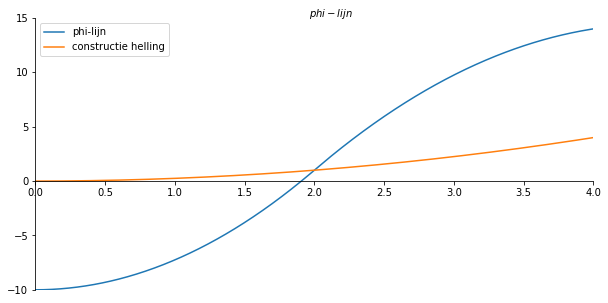

In [12]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, l)
ax.set_ylim(-10, 15)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(phi_list) + x_val**2/(4) , label='phi-lijn')
ax.plot(x_val, x_val**2/(4), label='constructie helling')
ax.legend();

In [13]:
x_val = np.linspace(0, l, 1000)
W_list = []
for i in x_val:
    theta = i/2
    W = - (Av/6) * sf(i, 0, 3) - (Bv/6) * sf(i, 4, 3) + (F/6) * sf(i, 2, 3) - Cphi * i
    W_list.append(W)

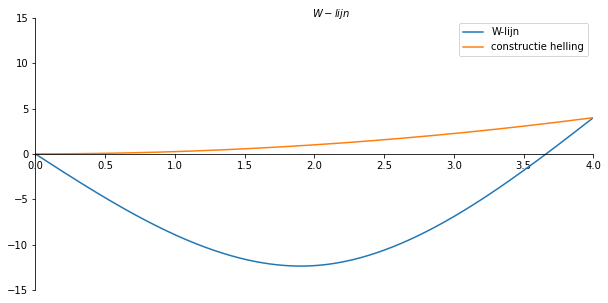

In [14]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, l)
ax.set_ylim(-15, 15)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$W-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val,- np.array(W_list) + x_val**2/(4) , label='W-lijn')
ax.plot(x_val, x_val**2/(4), label='constructie helling')
ax.legend();

In [15]:
display(N)

-Ah*sin(theta)*SingularityFunction(x, 0, 0) + Cn + (-Av*SingularityFunction(x, 0, 0) - Bv*SingularityFunction(x, 4, 0) + 10*SingularityFunction(x, 2.0, 0))*sin(theta)

In [16]:
-Av*sf(i, 0,0) - Bv * sf(i, 4, 0) + F*sf(i, l/2, 0) 

x_val = np.linspace(0, l, 1000)
N_list = []
for i in x_val:
    theta = i/2
    N = (-Av*sf(i, 0,0) - Bv * sf(i, 4, 0) + F*sf(i, l/2, 0)) * sp.sin(theta) 
    N_list.append(N)

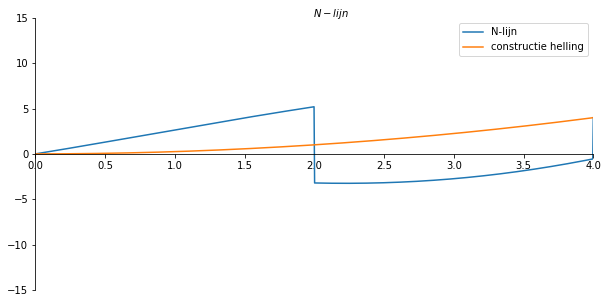

In [17]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, l)
ax.set_ylim(-15, 15)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$N-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val,- np.array(N_list) + x_val**2/(4) , label='N-lijn')
ax.plot(x_val, x_val**2/(4), label='constructie helling')
ax.legend();